In [1]:
# f_seed 需改 PY/init 中的 因为 models_logd 传入的是 global 的f_seed 值
from PYmodule import *
from PYmodule.models_logd import *

from matplotlib.legend_handler import HandlerLine2D, HandlerTuple

In [2]:
print(f_seed)
! ls ../M0r8*h5 ; ls ../*h5

0.01
../M0r8_f0.h5 ../M0r8_f1.h5 ../M0r8_f2.h5
../M0fMr8_f0.h5                  ../M0r8_f1.h5
../M0fMr8_f1.h5                  ../M0r8_f2.h5
../M0fMr8_f2.h5                  ../range3_l1.0_a-0.7_x0=1e-01.h5
../M0r8_f0.h5                    ../tutorial.h5


In [3]:
! ls ../M0fMr8_f0.h5

../M0fMr8_f0.h5


In [4]:
# best-fit paras and chi2s
for ff in [1,.1,.01]:
    fname = '../M0r8_'+'f%d'%abs(int(np.log10(ff)))+'.h5'
    reader = emcee.backends.HDFBackend(fname)
    
    Nburnin = 0
    Nthin = 1
    samples = reader.get_chain(discard=Nburnin)
    probs = reader.get_log_prob(discard=Nburnin)
    print('len of samples:', len(samples))

    samples = reader.get_chain(discard=Nburnin, thin=Nthin, flat=True)
    probs = reader.get_log_prob(discard=Nburnin, thin=Nthin, flat=True)
    print('len of extracted samples:', len(samples))
    theta_max = samples[np.argmax(probs)]
    print('best paras:',theta_max,'chi2={:.2f}'.format(np.max(probs)*-2))


len of samples: 5000
len of extracted samples: 500000
best paras: [23.12675104 -2.97342483  0.95753445 -0.06535641] chi2=15.77
len of samples: 5000
len of extracted samples: 500000
best paras: [20.07157851 -2.98140382  0.89453609  0.12195823] chi2=8.27
len of samples: 5000
len of extracted samples: 500000
best paras: [18.7555167  -1.2574505   0.87372563  0.20389703] chi2=6.21


In [5]:
f_seedlabel = 'f%d'%abs(int(np.log10(f_seed)))
f_seedlegend = r'$\mathrm{f_{seed}}=$'+str(f_seed)
fname = '../M0r8_'+f_seedlabel+'.h5'; prex = './' + f_seedlabel
# fname = '../M0fMr8_'+f_seedlabel+'.h5'; prex = './fM' + f_seedlabel # Merloni f_obs

print('fname=',fname)
# ! ls ../M0*.h5
labels = [r'$\tau$', r'$\log \delta$', r'$\lambda_0$', r'$\alpha$']

reader = emcee.backends.HDFBackend(fname)
ndim = len(labels)

# tau = reader.get_autocorr_time(tol=1)
# tau = np.max(tau); print('max tau:',tau)
# Nburnin = int(3*tau)
# Nthin = int(tau/2)

# v.s. Nburnin=500, Nthin=1 no big difference
Nburnin = 0
Nthin = 1

samples = reader.get_chain(discard=Nburnin)
probs = reader.get_log_prob(discard=Nburnin)
print('len of samples:', len(samples))

samples = reader.get_chain(discard=Nburnin, thin=Nthin, flat=True)
probs = reader.get_log_prob(discard=Nburnin, thin=Nthin, flat=True)
print('len of extracted samples:', len(samples))
theta_max = samples[np.argmax(probs)]
print('best paras:',theta_max,np.max(probs)*-2)


fname= ../M0r8_f2.h5
len of samples: 5000
len of extracted samples: 500000
best paras: [18.7555167  -1.2574505   0.87372563  0.20389703] 6.210907798281965


## corner

In [6]:
prex

'./f2'

Quantiles:
[(0.16, 14.332600793590423), (0.5, 22.32815815532986), (0.84, 37.53738478903948)]
Quantiles:
[(0.16, -2.613802842260556), (0.5, -1.6704544659888059), (0.84, -1.0006625128893034)]
Quantiles:
[(0.16, 0.5915781808214193), (0.5, 0.8150665423137782), (0.84, 1.086541226133427)]
Quantiles:
[(0.16, 0.07638762631434237), (0.5, 0.23714992468532353), (0.84, 0.43850374626838395)]
0.01


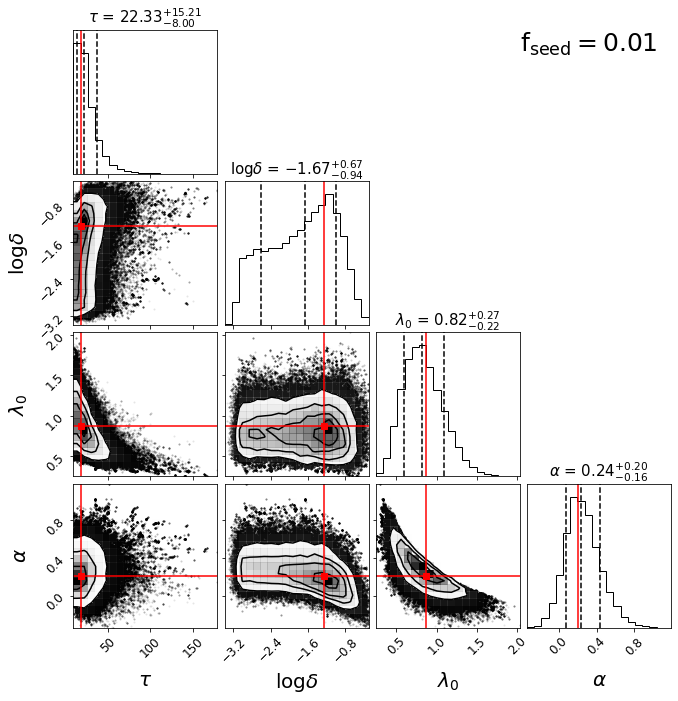

In [7]:
%matplotlib inline
# Make the base corner plot
fig = corner.corner(samples,show_titles=True,title_kwargs={'fontsize':15},
                    label_kwargs={'fontsize':20},max_n_ticks=4,labels=labels,
                    plot_datapoints=True,
                    quantiles=[0.16, 0.5, 0.84], verbose=True
                   )
# Extract the axes
axes = np.array(fig.axes).reshape((ndim, ndim))
for i in range(ndim):
    for j in range(ndim):
        axes[i][j].tick_params(labelsize=12)
        
# Loop over the diagonal
for i in range(ndim):
    ax = axes[i, i]
    ax.axvline(theta_max[i],color="r",lw=1.5)

# Loop over the histograms
for yi in range(ndim):
    for xi in range(yi):
        ax = axes[yi, xi]
        ax.axvline(theta_max[xi],color="r",lw=1.5)
        ax.axhline(theta_max[yi],color="r",lw=1.5)
        ax.plot(theta_max[xi], theta_max[yi], "sr")
if f_seed==0.1:
    ax.text(1, 4, r"$\mathrm{f_{seed}=0.1}$", transform=ax.transAxes, fontdict={'size': '25', 'color': 'k'})
elif f_seed==0.01:
    ax.text(1, 4, r"$\mathrm{f_{seed}=0.01}$", transform=ax.transAxes, fontdict={'size': '25', 'color': 'k'})

plt.savefig(figpre+f_seedlabel+'_corner.pdf',dpi=400,rasterized=True)

print(f_seed)

## generate MF & LF data  (moved to h5z6MFLF.py)

In [8]:
ndraw = 60
fslabel
fslegend

20

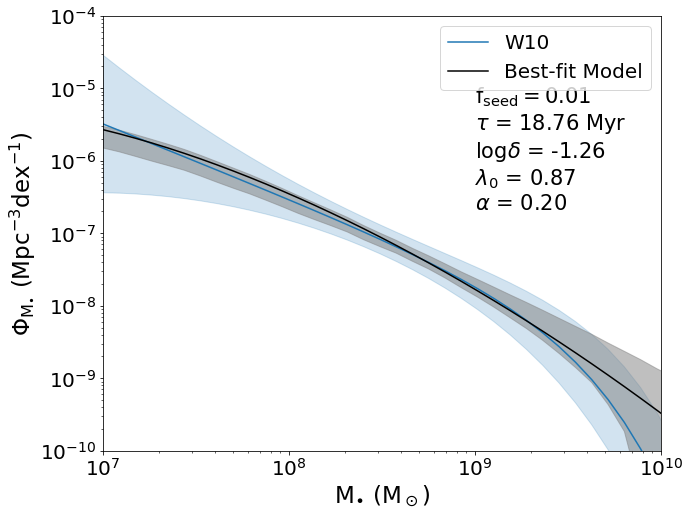

In [9]:
curve_name = 'MF'
fMname = datapre+ f_seedlabel+'ndraw%d'%ndraw+curve_name
T_ = ascii.read(fMname, guess=False, delimiter=' ')
xs = T_['xs']
y_data = T_['y_data']
y_logdata = np.log10(y_data)
y_best = T_['y_best']
y_err = T_['y_err']
med_model = T_['med_model']
spread    = T_['spread']

fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(xs, y_data, c='C0',label='W10')
# error band of W10
ax.fill_between(xs,pow(10.,y_logdata-y_err),pow(10.,y_logdata+y_err),color='C0',alpha=0.2,label='_data error')


ax.fill_between(xs,med_model-spread,med_model+spread,color='grey',alpha=0.5,label=r'_$1\sigma$ Posterior Spread')
ax.plot(xs, y_best, c='black', label='Best-fit Model')

ax.text(1e9,1e-7, f_seedlegend+'\n'+ \
labels[0]+' = %.2f Myr\n'%(theta_max[0])+labels[1]+' = %.2f\n'%(theta_max[1])\
+labels[2]+' = %.2f\n'%(theta_max[2])+labels[3]+' = %.2f\n'%(theta_max[3])
, fontsize=21)

ax.set_xlim(1e7,1e10); ax.set_xscale('log')
ax.set_ylim(1e-10,1e-4); ax.set_yscale('log')
ax.legend(fontsize=fslegend)
plt.xlabel(r'$\mathrm{M_{\bullet}~(M_\odot)}$',fontsize=fslabel)
plt.ylabel(r'$\mathrm{\Phi_{M_{\bullet}}~(Mpc^{-3}dex^{-1})}$',fontsize=fslabel)
plt.tick_params(labelsize=fstick)

plt.savefig(figpre+f_seedlabel+'ndraw%dMF_spread.pdf'%ndraw,dpi=300,bbox_inches='tight')


In [10]:
!ls ../data/f2ndraw60MF

../data/f2ndraw60MF


# ---------------------------------         QLF         ----------------------------------------


In [11]:
# G15 3 data points 
M1450_G = np.array([-19,-20,-21]); logPhi_G = np.array([-5.2,-5.1,-5.7])
logPhicorr_G = np.array([-4.7,-4.7,-5.7])
print( M1450_G, pow(10,logPhi_G) )

# Giallongo 2019; X-ray faint QLF 4 data points
M1450_G19 = np.array([-19,-20,-21,-22]); Phi_G19 = np.array([7.27,4.77,0.69,0.62])*1e-6
Phip_G19 = np.array([7.12,3.79,1.61,1.44])*1e-6; Phim_G19 = np.array([4.02,2.31,0.60,0.54])*1e-6
# QLF sample: z=5.5 to 6.1; z=5.55 to z=6; extrapolating w/ Jiang2016 density evolution slope: -0.72
Phi_G19 *= pow(10, -0.72*(6-5.55))
Phip_G19*= pow(10, -0.72*(6-5.55))
Phim_G19*= pow(10, -0.72*(6-5.55))

# Jiang 2022;
namelist = [#'fig3a_data_individualFields',
           'fig3a_data_combinedFields_95CL',
           #'fig3a_data_combinedFields_75CL',
           ]
nameFitlist = [#'fig3a_data_modelFit_75CL',
           'fig3a_data_modelFit_95CL',
           ]
name = 'fig3a_data_combinedFields_95CL'
T_J = ascii.read('../data/Jiang_SD_Fig3/%s.txt'%(namelist[0]), guess=False, delimiter=' ',names=['M1450','Phi_cumu'])
M1450_J = (T_J['M1450'][1:] + T_J['M1450'][:-1]) /2.
dM1450_J = T_J['M1450'][1:] - T_J['M1450'][:-1]
Phi_J = 1e-9* (T_J['Phi_cumu'][1:] - T_J['Phi_cumu'][:-1])/dM1450_J

print(M1450_J,'\n', dM1450_J)

[-19 -20 -21] [6.30957344e-06 7.94328235e-06 1.99526231e-06]
       M1450       
-------------------
            -21.125
-20.435000000000002
            -19.705 
       M1450       
------------------
0.7100000000000009
0.6699999999999982
0.7900000000000027


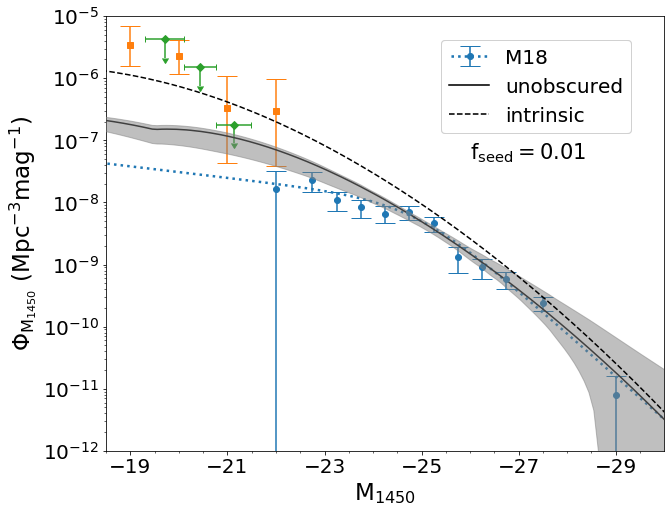

In [12]:
curve_name = 'LF'
fLname = datapre+f_seedlabel+'ndraw%d'%ndraw+curve_name
T_ = ascii.read(fLname, guess=False, delimiter=' ')

xs = T_['xs']
x_data = T_['x_data']
y_data = T_['y_data']
y_data_err = T_['y_data_err']
y_best = T_['y_best']
med_model = T_['med_model']
spread    = T_['spread']


fig, ax = plt.subplots(figsize=(10, 8))
# Matsuoka 2018; data(errorbar) + fitting curve
p1=ax.errorbar(x_data, y_data/1e9, yerr=y_data_err/1e9,fmt='o',capsize=10, label='M18')
p1_,=ax.plot(xs,LF_M1450(xs),':',lw=2.5,c='C0',label='_Matsu fitting')

ax.fill_between(xs,(med_model-spread)/1e9,(med_model+spread)/1e9,color='grey',alpha=0.5,label='_',zorder=5)
p2,=ax.plot(xs, y_best/1e9, c='black', label='unobscured')
p3,=ax.plot(xs, y_best/1e9*corr_U14D20(xs),'--', c='black', label='intrinsic',zorder=5)


# Giallongo 2015; data + Poission errors
# ax.errorbar(M1450_G, pow(10,logPhicorr_G), yerr=pow(10,logPhicorr_G)/np.array([1,3**.5,1]),fmt='s',capsize=10, label='Giallongo+15')
# Giallongo 2019; Phi_corr data + errors
ax.errorbar(M1450_G19, Phi_G19, yerr=[Phim_G19,Phip_G19],fmt='s',capsize=10, label='_Giallongo+19')

# Jiang 2022; upper limits
# for name in namelist:
#     T_J = ascii.read('../data/Jiang_SD_Fig3/%s.txt'%name, guess=False, delimiter=' ',names=['M1450','Phi'])
#     M1450_J = T_J['M1450']
#     logPhi_J = T_J['Phi']/1e9
ax.errorbar( M1450_J, Phi_J,xerr=dM1450_J/2, yerr = Phi_J/2,uplims=True, label='_Jiang+ 22',fmt='D',color='C2',capsize=3)

# for name in nameFitlist:
#     T_J = ascii.read('../data/Jiang_SD_Fig3/%s.txt'%name, guess=False, delimiter=' ',names=['M1450','Phi'])
#     M1450_J = T_J['M1450']
#     logPhi_J = T_J['Phi']/1e9
#     ax.plot( M1450_J, logPhi_J, c='C2')

ax.text(-26,5e-8, f_seedlegend, fontsize=21)

ax.set_xlim(-18.5,-30)
ax.set_ylim(1e-12,1e-5)
ax.set_yscale('log')
plt.xlabel(r'$\mathrm{M_{1450}}$',fontsize=fslabel)
plt.ylabel(r'$\mathrm{\Phi_{M_{1450}}~(Mpc^{-3}mag^{-1})}$',fontsize=fslabel)
plt.tick_params(labelsize=fstick)
# plt.tight_layout()
plt.legend([p1,p2,p3],
           ['M18','unobscured','intrinsic'],
           fontsize=fslegend)

first_legend = ax.legend([(p1,p1_),p2,p3],
                         ['M18','unobscured','intrinsic'],
#                            numpoints=1,
#                            handler_map={tuple: HandlerTuple(ndivide=1,pad=.5,xpad=0,ypad=.7)},
                         handler_map={tuple: HandlerTuple(ndivide=1,xpad=0.1,ypad=-.3)},
                         fontsize=fslegend,loc=(.6,.73))
ax.add_artist(first_legend)

locmajx = FixedLocator(np.arange(-17,-30,-2)) # subs=(0.2,0.4,0.6,0.8)
locminx = FixedLocator(np.arange(17,-30,-.5)) # subs=(0.2,0.4,0.6,0.8)
ax.xaxis.set_major_locator(locmajx)
ax.xaxis.set_minor_locator(locminx)
ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

locmajy = LogLocator(base=10,numticks=100)
locminy = LogLocator(base=10,subs=np.arange(2, 10) * .1,numticks=100) # subs=(0.2,0.4,0.6,0.8)
ax.yaxis.set_major_locator(locmajy)
ax.yaxis.set_minor_locator(locminy)
ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

plt.savefig(figpre+f_seedlabel+'ndraw%dLF_spread.pdf'%ndraw,dpi=300,bbox_inches='tight')

In [13]:
print(datapre)

../data/


In [14]:
! ls datapre + 'M0'

ls: +: No such file or directory
ls: M0: No such file or directory
ls: datapre: No such file or directory


# prev